<a href="https://colab.research.google.com/github/LiangChen518/-/blob/main/Abalone_Age_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#WQD7003 DATA ANALYTICS


#Project Proposal
Title: Exploring the relationship between abalone rings and other characteristics

## Initial Questions

1. What is the ring of the abalone based on other variables in datasets
2. To evaluate the performance of different machine learning models on the prediction of the age of the abalones
 


## Overview
Abalone has great commercial values.Usually, the price of abalone is decided by its age. The older the abalone are, the more commercial values they usually have. By identifying the abalone's age correctly, the farmers can sale the abalones in a fair price and customer can make better decision about whether does the abalone worth the price.

It also offers value for management of the abalone farming. Knowing more about the correct age of the abalone gives more information about the current situation of the abalone farm. Overfarming abalones is not healthy for the environment and the sustainable development of the farm. It would be hard to tell if the farm is overfarmed or not without knowing the correct ages of the abalones.

The age of the abalone is usually caculated by counting rings and then plus 1.5. This usually requires to kill the abalone,get the shell and then count the rings under microscope. There are studies in biology trying to get precise ages from test the amount of a specific element. In order to get the correct age of abalone without harming the abalone, the method of machine learning get in the way. By using other characteristic that is easy to measure like the weight, length and diameter, the model is going to give a prediction of the ages of the abalones. 

## Motivations

1)  Keen to know more on marine snails - abalone, a once-endandered shellfish that's sweet, rich, and very expensive.
Predict abalones ages with other characteristics of abalones.

2) Try to figure out the business value of abalone food.

3) Get the variable that will affect the age of abalone the most.



## Data Source
https://www.kaggle.com/rodolfomendes/abalone-dataset 



##Related Work

Growth of the European abalone (Haliotis tuberculata L.) in situ: Seasonality and ageing using stable oxygen isotopes

https://www-sciencedirect-com.ezproxy.um.edu.my/science/article/pii/S1385110110001218

Abalone Age Prediction Problem: A Review

https://www.ijcaonline.org/archives/volume178/number50/mehta-2019-ijca-919425.pdf

Prediction of Abalone Age Using Regression-Based Neural Network

https://ieeexplore-ieee-org.ezproxy.um.edu.my/document/8970983 

#Variable discription
`Sex`: M (male), F (female), I (infant)

`Length`: longest shell measurement (in mm)

`Diameter`: measurement perpendicular to length (in mm)

`Height`: with meat in shell (in mm)

`Whole weight`: the whole abalone (in grams)

`Shucked weight`: weight of the meat (in grams)

`Viscera weight`: gut weight after bleeding (in grams)

`Shell weight`: after being dried (in grams)

`Rings`: + 1.5 gives the age in years (the value to predict)

#Data Preprocessing

In [ ]:
import os
import pandas as pd
import seaborn as sns
ds = pd.read_csv("/content/abalone.csv")
index = ['sex','length','diameter','height','whole_weight','shucked_weight','viscera_weight','shell_weight','rings']

In [ ]:
df_new = pd.DataFrame(ds)
df_new.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [ ]:
# No Missing Value
df_new.isna().mean().to_frame(name='% of missing values')

,% of missing values
Sex,0.0
Length,0.0
Diameter,0.0
Height,0.0
Whole weight,0.0
Shucked weight,0.0
Viscera weight,0.0
Shell weight,0.0
Rings,0.0


#Detecting and Removing Outliers


# Detecting Outliers

wetry to use the boxplot to find the outliers for every variables

In [ ]:
df_new.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

Variable **Length**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


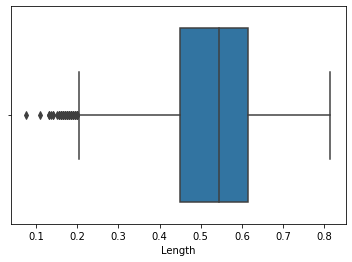

In [ ]:
sns.boxplot(df_new['Length'])

Variable **Diameter**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


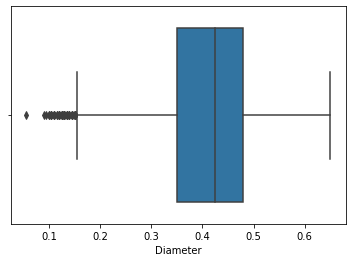

In [ ]:
sns.boxplot(df_new['Diameter'])

*Variable* **Height**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


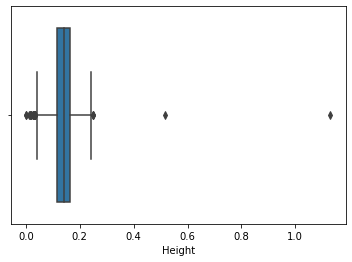

In [ ]:
sns.boxplot(df_new['Height'])

Variable **Viscera Weight**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


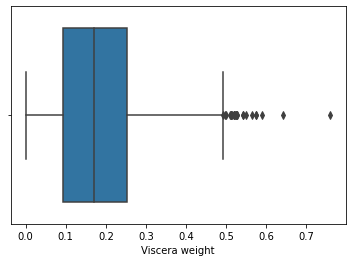

In [ ]:
sns.boxplot(df_new['Viscera weight'])

Variable **Whole-Weight**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


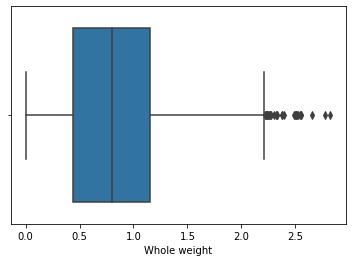

In [ ]:
sns.boxplot(df_new['Whole weight'])

Variable **Shucked Weight**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


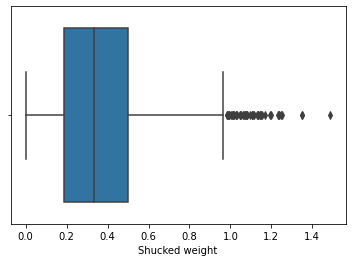

In [ ]:
sns.boxplot(df_new['Shucked weight'])

Variable **Shell Weight**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


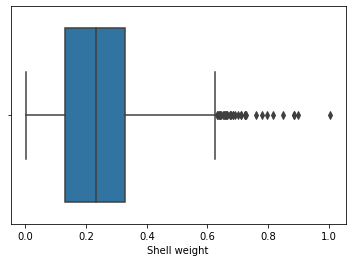

In [ ]:
sns.boxplot(df_new['Shell weight'])

# Removing Outliers

We remove 153 data that are the outliers by using the IQR

In [ ]:
print("Old Shape: ", df_new.shape)
cols = ['Diameter','Length','Height','Whole weight','Shucked weight', 'Viscera weight', 'Shell weight']

Q1 = df_new[cols].quantile(0.25)
Q3 = df_new[cols].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

df_new = df_new[~((df_new[cols] < (Q1 - 1.5 * IQR)) |(df_new[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
print("New Shape: ", df_new.shape)

Old Shape:  (4177, 9)
Diameter          0.1300
Length            0.1650
Height            0.0500
Whole weight      0.7115
Shucked weight    0.3160
Viscera weight    0.1595
Shell weight      0.1990
dtype: float64
New Shape:  (4024, 9)


#Data Correlation

We use the lineplot to visualize the relationship between every variables to the rings

In [ ]:
##plot sex against rings
import seaborn as sns
df_new.columns=['sex','length','diameter','height','whole_weight','shucked_weight','viscera_weight','shell_weight','rings']
df=df_new
df.head()


,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


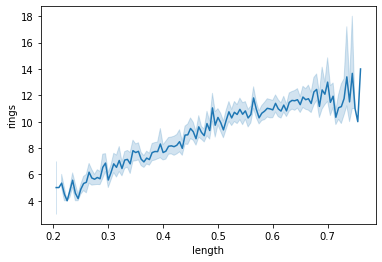

In [ ]:
##plot length against rings
import seaborn as sns
ax = sns.lineplot(x="length", y="rings", data=df)

##It shows an upward trend when length increase, rings increase

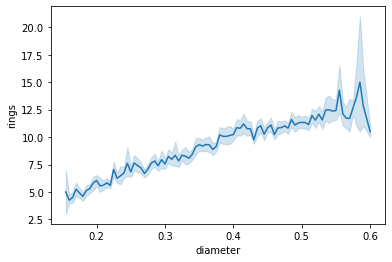

In [ ]:
##plot diameter against rings
import seaborn as sns
ax = sns.lineplot(x="diameter", y="rings", data=df)

##It shows an upward trend when diameter increase, rings increase, but there is a drop after diameter reached 0.58

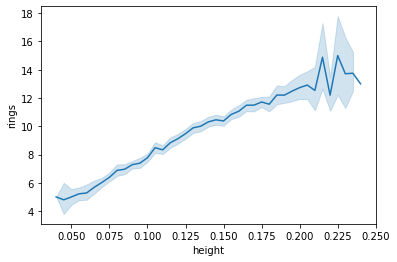

In [ ]:
##plot height against rings
import seaborn as sns
ax = sns.lineplot(x="height", y="rings", data=df)

##It shows an upward trend when height increase, rings increase

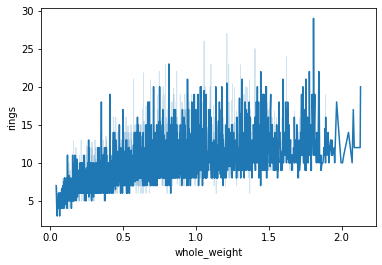

In [ ]:
##plot whole_weight against rings
import seaborn as sns
ax = sns.lineplot(x="whole_weight", y="rings", data=df)

##It shows a peak in weight around 1.5-2.0

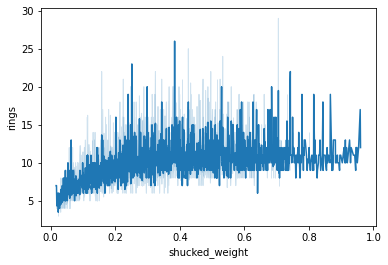

In [ ]:
##plot shucked_weight against rings
import seaborn as sns
ax = sns.lineplot(x="shucked_weight", y="rings", data=df)

## It shows in between 0.2-0.4, there are two peak that have most number of rings.

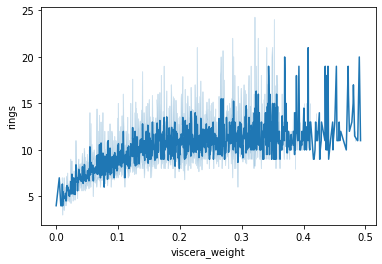

In [ ]:
##plot viscera_weight against rings
import seaborn as sns
ax = sns.lineplot(x="viscera_weight", y="rings", data=df)

## ring gradually increase with the increase of viscera weight

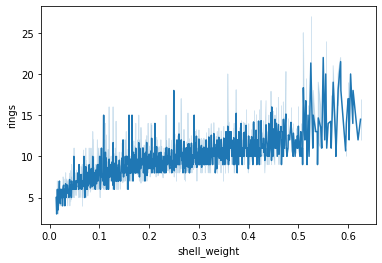

In [ ]:
##plot shell_weight against rings
import seaborn as sns
ax = sns.lineplot(x="shell_weight", y="rings", data=df)

## ring gradually increase with the increase of shell weight

In [ ]:
#Define a function to plot the graph
import seaborn as sns
import matplotlib.pyplot as plt
def plot(X,x,title):
    temp_index = index[1:]
    dataset = pd.DataFrame(X, columns=temp_index)
    print(title)
    print(dataset.head())
    sns.set()
    ax = sns.lineplot(x=x, y="rings", data=dataset)
    plt.show()

#Standard Scaler:
Transforms the data in such a manner that it has mean as 0 and standard deviation as 1. We want to arrange the data in standard normal distribution and use in classification.

After standard scaling
     length  diameter   height  ...  viscera_weight  shell_weight     rings
0 -0.632245 -0.474574 -1.23997  ...       -0.753592     -0.665126  1.616258
1 -1.580579 -1.562434 -1.38003  ...       -1.270933     -1.296032 -0.945563
2  0.045136  0.123750 -0.11949  ...       -0.354500     -0.191946 -0.305108
3 -0.767721 -0.474574 -0.39961  ...       -0.625488     -0.625694  0.015120
4 -1.761214 -1.671220 -1.66015  ...       -1.359620     -1.414327 -0.945563

[5 rows x 8 columns]


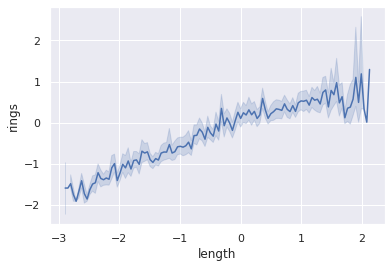

After standard scaling
     length  diameter   height  ...  viscera_weight  shell_weight     rings
0 -0.632245 -0.474574 -1.23997  ...       -0.753592     -0.665126  1.616258
1 -1.580579 -1.562434 -1.38003  ...       -1.270933     -1.296032 -0.945563
2  0.045136  0.123750 -0.11949  ...       -0.354500     -0.191946 -0.305108
3 -0.767721 -0.474574 -0.39961  ...       -0.625488     -0.625694  0.015120
4 -1.761214 -1.671220 -1.66015  ...       -1.359620     -1.414327 -0.945563

[5 rows x 8 columns]


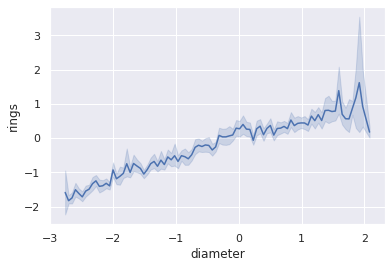

After standard scaling
     length  diameter   height  ...  viscera_weight  shell_weight     rings
0 -0.632245 -0.474574 -1.23997  ...       -0.753592     -0.665126  1.616258
1 -1.580579 -1.562434 -1.38003  ...       -1.270933     -1.296032 -0.945563
2  0.045136  0.123750 -0.11949  ...       -0.354500     -0.191946 -0.305108
3 -0.767721 -0.474574 -0.39961  ...       -0.625488     -0.625694  0.015120
4 -1.761214 -1.671220 -1.66015  ...       -1.359620     -1.414327 -0.945563

[5 rows x 8 columns]


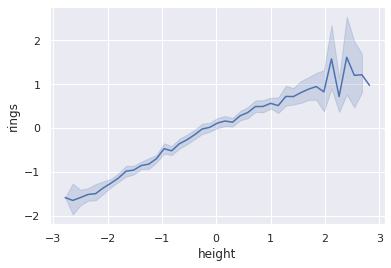

After standard scaling
     length  diameter   height  ...  viscera_weight  shell_weight     rings
0 -0.632245 -0.474574 -1.23997  ...       -0.753592     -0.665126  1.616258
1 -1.580579 -1.562434 -1.38003  ...       -1.270933     -1.296032 -0.945563
2  0.045136  0.123750 -0.11949  ...       -0.354500     -0.191946 -0.305108
3 -0.767721 -0.474574 -0.39961  ...       -0.625488     -0.625694  0.015120
4 -1.761214 -1.671220 -1.66015  ...       -1.359620     -1.414327 -0.945563

[5 rows x 8 columns]


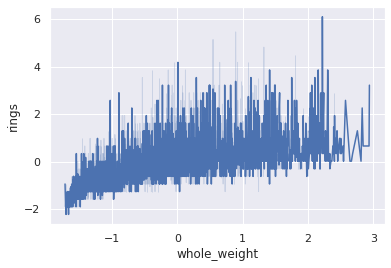

After standard scaling
     length  diameter   height  ...  viscera_weight  shell_weight     rings
0 -0.632245 -0.474574 -1.23997  ...       -0.753592     -0.665126  1.616258
1 -1.580579 -1.562434 -1.38003  ...       -1.270933     -1.296032 -0.945563
2  0.045136  0.123750 -0.11949  ...       -0.354500     -0.191946 -0.305108
3 -0.767721 -0.474574 -0.39961  ...       -0.625488     -0.625694  0.015120
4 -1.761214 -1.671220 -1.66015  ...       -1.359620     -1.414327 -0.945563

[5 rows x 8 columns]


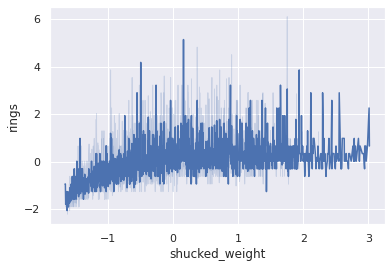

After standard scaling
     length  diameter   height  ...  viscera_weight  shell_weight     rings
0 -0.632245 -0.474574 -1.23997  ...       -0.753592     -0.665126  1.616258
1 -1.580579 -1.562434 -1.38003  ...       -1.270933     -1.296032 -0.945563
2  0.045136  0.123750 -0.11949  ...       -0.354500     -0.191946 -0.305108
3 -0.767721 -0.474574 -0.39961  ...       -0.625488     -0.625694  0.015120
4 -1.761214 -1.671220 -1.66015  ...       -1.359620     -1.414327 -0.945563

[5 rows x 8 columns]


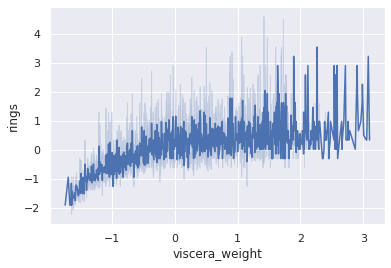

After standard scaling
     length  diameter   height  ...  viscera_weight  shell_weight     rings
0 -0.632245 -0.474574 -1.23997  ...       -0.753592     -0.665126  1.616258
1 -1.580579 -1.562434 -1.38003  ...       -1.270933     -1.296032 -0.945563
2  0.045136  0.123750 -0.11949  ...       -0.354500     -0.191946 -0.305108
3 -0.767721 -0.474574 -0.39961  ...       -0.625488     -0.625694  0.015120
4 -1.761214 -1.671220 -1.66015  ...       -1.359620     -1.414327 -0.945563

[5 rows x 8 columns]


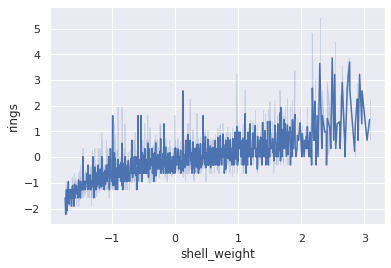

In [ ]:
#Standardize features by removing the mean and scaling to unit variance
import numpy as np
from sklearn.preprocessing import StandardScaler

df_standardize = df.copy()
df_standardize = df_standardize.drop(columns = 'sex')
scaler = StandardScaler().fit_transform(df_standardize)
for i in index:
  if(i!='sex' and i!='rings'):
    plot(scaler,i,"After standard scaling")

#MaxAbsScaler
Scales each feature by its maximum absolute value. Once defined, we call the fit_transform() function and pass it to our dataset to create a transformed version of our dataset.

After max absolute scaling
     length  diameter    height  ...  viscera_weight  shell_weight     rings
0  0.598684  0.608333  0.395833  ...        0.205285         0.240  0.517241
1  0.460526  0.441667  0.375000  ...        0.098577         0.112  0.241379
2  0.697368  0.700000  0.562500  ...        0.287602         0.336  0.310345
3  0.578947  0.608333  0.520833  ...        0.231707         0.248  0.344828
4  0.434211  0.425000  0.333333  ...        0.080285         0.088  0.241379

[5 rows x 8 columns]


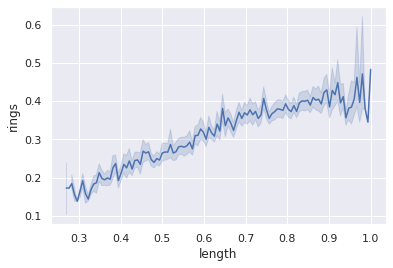

After max absolute scaling
     length  diameter    height  ...  viscera_weight  shell_weight     rings
0  0.598684  0.608333  0.395833  ...        0.205285         0.240  0.517241
1  0.460526  0.441667  0.375000  ...        0.098577         0.112  0.241379
2  0.697368  0.700000  0.562500  ...        0.287602         0.336  0.310345
3  0.578947  0.608333  0.520833  ...        0.231707         0.248  0.344828
4  0.434211  0.425000  0.333333  ...        0.080285         0.088  0.241379

[5 rows x 8 columns]


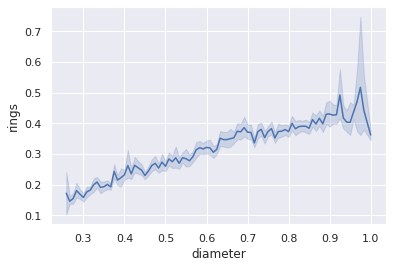

After max absolute scaling
     length  diameter    height  ...  viscera_weight  shell_weight     rings
0  0.598684  0.608333  0.395833  ...        0.205285         0.240  0.517241
1  0.460526  0.441667  0.375000  ...        0.098577         0.112  0.241379
2  0.697368  0.700000  0.562500  ...        0.287602         0.336  0.310345
3  0.578947  0.608333  0.520833  ...        0.231707         0.248  0.344828
4  0.434211  0.425000  0.333333  ...        0.080285         0.088  0.241379

[5 rows x 8 columns]


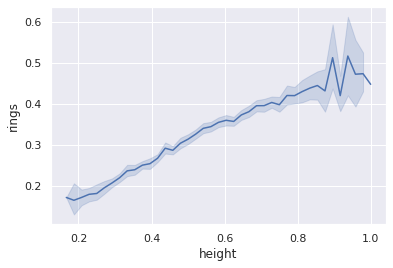

After max absolute scaling
     length  diameter    height  ...  viscera_weight  shell_weight     rings
0  0.598684  0.608333  0.395833  ...        0.205285         0.240  0.517241
1  0.460526  0.441667  0.375000  ...        0.098577         0.112  0.241379
2  0.697368  0.700000  0.562500  ...        0.287602         0.336  0.310345
3  0.578947  0.608333  0.520833  ...        0.231707         0.248  0.344828
4  0.434211  0.425000  0.333333  ...        0.080285         0.088  0.241379

[5 rows x 8 columns]


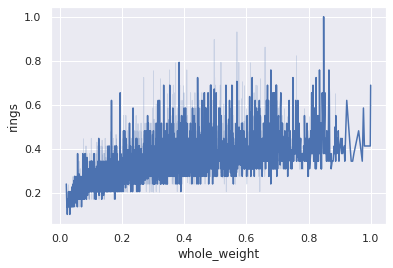

After max absolute scaling
     length  diameter    height  ...  viscera_weight  shell_weight     rings
0  0.598684  0.608333  0.395833  ...        0.205285         0.240  0.517241
1  0.460526  0.441667  0.375000  ...        0.098577         0.112  0.241379
2  0.697368  0.700000  0.562500  ...        0.287602         0.336  0.310345
3  0.578947  0.608333  0.520833  ...        0.231707         0.248  0.344828
4  0.434211  0.425000  0.333333  ...        0.080285         0.088  0.241379

[5 rows x 8 columns]


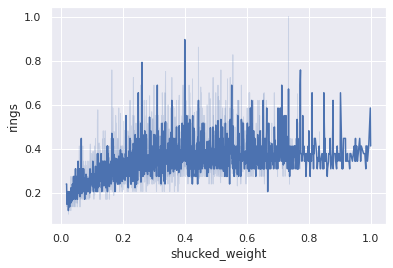

After max absolute scaling
     length  diameter    height  ...  viscera_weight  shell_weight     rings
0  0.598684  0.608333  0.395833  ...        0.205285         0.240  0.517241
1  0.460526  0.441667  0.375000  ...        0.098577         0.112  0.241379
2  0.697368  0.700000  0.562500  ...        0.287602         0.336  0.310345
3  0.578947  0.608333  0.520833  ...        0.231707         0.248  0.344828
4  0.434211  0.425000  0.333333  ...        0.080285         0.088  0.241379

[5 rows x 8 columns]


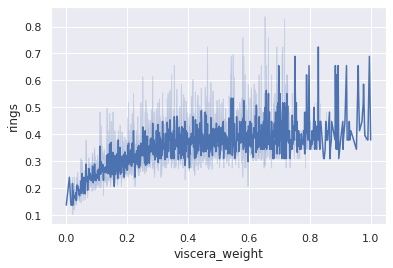

After max absolute scaling
     length  diameter    height  ...  viscera_weight  shell_weight     rings
0  0.598684  0.608333  0.395833  ...        0.205285         0.240  0.517241
1  0.460526  0.441667  0.375000  ...        0.098577         0.112  0.241379
2  0.697368  0.700000  0.562500  ...        0.287602         0.336  0.310345
3  0.578947  0.608333  0.520833  ...        0.231707         0.248  0.344828
4  0.434211  0.425000  0.333333  ...        0.080285         0.088  0.241379

[5 rows x 8 columns]


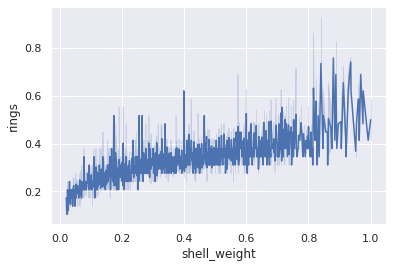

In [ ]:
#Scale each feature by its maximum absolute value.
from sklearn.preprocessing import MaxAbsScaler
max_abs_scaler = MaxAbsScaler()
X = max_abs_scaler.fit_transform(df_standardize)
for i in index:
  if(i!='sex' and i!='rings'):
    plot(X,i,"After max absolute scaling")

In [ ]:
#print the dataframe after standardization
df_standardize

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


#Quantiles Information
This transformation tends to spread out the most frequent values.

Quantile Transformed Data:
[[0.250501   0.29859719 0.13026052 ... 0.26804593 0.29659319 0.92785571]
 [0.08116232 0.08617234 0.10220441 ... 0.10398445 0.10220441 0.14428858]
 [0.46492986 0.48296593 0.42885772 ... 0.40280561 0.4488978  0.41883768]
 ...
 [0.70841683 0.73046092 0.97995992 ... 0.84168337 0.71138743 0.41883768]
 [0.80260521 0.77855711 0.58517034 ... 0.78356713 0.6862388  0.58116232]
 [0.98496994 0.97795591 0.95190381 ... 0.96392786 0.97529137 0.80561122]]

Yeo-Johnson Power Transformed Data:
[[-0.72766232 -0.58052577 -1.2268493  ... -0.72476486 -0.6250135
   1.50711664]
 [-1.484462   -1.47101401 -1.35476962 ... -1.38212534 -1.38385803
  -1.02851036]
 [-0.06962314  0.01580266 -0.1550076  ... -0.26805185 -0.1112766
  -0.17243656]
 ...
 [ 0.64428911  0.69773696  1.93722349 ...  1.09073954  0.64241011
  -0.17243656]
 [ 0.92451353  0.83157118  0.26966111 ...  0.87270335  0.55524204
   0.18140474]
 [ 1.98508261  1.85983455  1.62084052 ...  1.74824893  1.84784667
   0.7851031 ]]

A

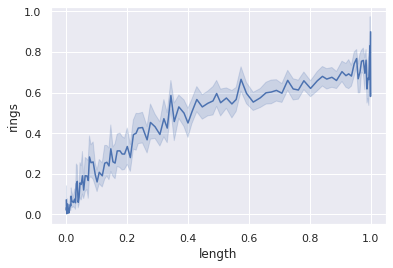

After Yeo-Johnson power transformed
     length  diameter    height  ...  viscera_weight  shell_weight     rings
0 -0.727662 -0.580526 -1.226849  ...       -0.724765     -0.625014  1.507117
1 -1.484462 -1.471014 -1.354770  ...       -1.382125     -1.383858 -1.028510
2 -0.069623  0.015803 -0.155008  ...       -0.268052     -0.111277 -0.172437
3 -0.846994 -0.580526 -0.431156  ...       -0.573706     -0.580507  0.181405
4 -1.608992 -1.547657 -1.606655  ...       -1.503065     -1.536758 -1.028510

[5 rows x 8 columns]


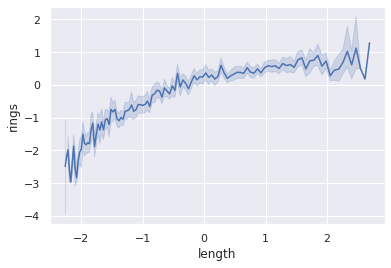

After quantile transformed
     length  diameter    height  ...  viscera_weight  shell_weight     rings
0  0.250501  0.298597  0.130261  ...        0.268046      0.296593  0.927856
1  0.081162  0.086172  0.102204  ...        0.103984      0.102204  0.144289
2  0.464930  0.482966  0.428858  ...        0.402806      0.448898  0.418838
3  0.220441  0.298597  0.338677  ...        0.312625      0.309619  0.581162
4  0.062124  0.072144  0.054108  ...        0.076152      0.068136  0.144289

[5 rows x 8 columns]


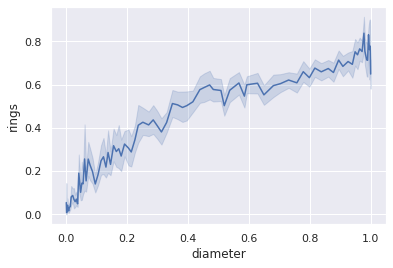

After Yeo-Johnson power transformed
     length  diameter    height  ...  viscera_weight  shell_weight     rings
0 -0.727662 -0.580526 -1.226849  ...       -0.724765     -0.625014  1.507117
1 -1.484462 -1.471014 -1.354770  ...       -1.382125     -1.383858 -1.028510
2 -0.069623  0.015803 -0.155008  ...       -0.268052     -0.111277 -0.172437
3 -0.846994 -0.580526 -0.431156  ...       -0.573706     -0.580507  0.181405
4 -1.608992 -1.547657 -1.606655  ...       -1.503065     -1.536758 -1.028510

[5 rows x 8 columns]


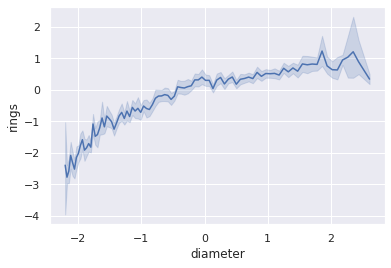

After quantile transformed
     length  diameter    height  ...  viscera_weight  shell_weight     rings
0  0.250501  0.298597  0.130261  ...        0.268046      0.296593  0.927856
1  0.081162  0.086172  0.102204  ...        0.103984      0.102204  0.144289
2  0.464930  0.482966  0.428858  ...        0.402806      0.448898  0.418838
3  0.220441  0.298597  0.338677  ...        0.312625      0.309619  0.581162
4  0.062124  0.072144  0.054108  ...        0.076152      0.068136  0.144289

[5 rows x 8 columns]


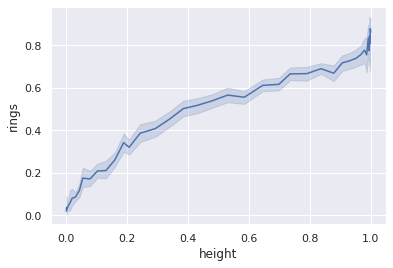

After Yeo-Johnson power transformed
     length  diameter    height  ...  viscera_weight  shell_weight     rings
0 -0.727662 -0.580526 -1.226849  ...       -0.724765     -0.625014  1.507117
1 -1.484462 -1.471014 -1.354770  ...       -1.382125     -1.383858 -1.028510
2 -0.069623  0.015803 -0.155008  ...       -0.268052     -0.111277 -0.172437
3 -0.846994 -0.580526 -0.431156  ...       -0.573706     -0.580507  0.181405
4 -1.608992 -1.547657 -1.606655  ...       -1.503065     -1.536758 -1.028510

[5 rows x 8 columns]


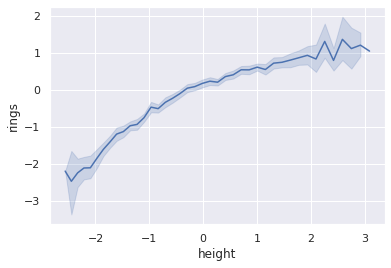

After quantile transformed
     length  diameter    height  ...  viscera_weight  shell_weight     rings
0  0.250501  0.298597  0.130261  ...        0.268046      0.296593  0.927856
1  0.081162  0.086172  0.102204  ...        0.103984      0.102204  0.144289
2  0.464930  0.482966  0.428858  ...        0.402806      0.448898  0.418838
3  0.220441  0.298597  0.338677  ...        0.312625      0.309619  0.581162
4  0.062124  0.072144  0.054108  ...        0.076152      0.068136  0.144289

[5 rows x 8 columns]


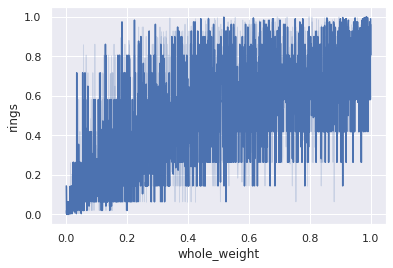

After Yeo-Johnson power transformed
     length  diameter    height  ...  viscera_weight  shell_weight     rings
0 -0.727662 -0.580526 -1.226849  ...       -0.724765     -0.625014  1.507117
1 -1.484462 -1.471014 -1.354770  ...       -1.382125     -1.383858 -1.028510
2 -0.069623  0.015803 -0.155008  ...       -0.268052     -0.111277 -0.172437
3 -0.846994 -0.580526 -0.431156  ...       -0.573706     -0.580507  0.181405
4 -1.608992 -1.547657 -1.606655  ...       -1.503065     -1.536758 -1.028510

[5 rows x 8 columns]


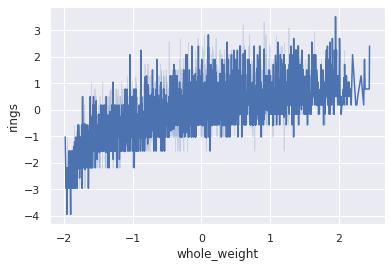

After quantile transformed
     length  diameter    height  ...  viscera_weight  shell_weight     rings
0  0.250501  0.298597  0.130261  ...        0.268046      0.296593  0.927856
1  0.081162  0.086172  0.102204  ...        0.103984      0.102204  0.144289
2  0.464930  0.482966  0.428858  ...        0.402806      0.448898  0.418838
3  0.220441  0.298597  0.338677  ...        0.312625      0.309619  0.581162
4  0.062124  0.072144  0.054108  ...        0.076152      0.068136  0.144289

[5 rows x 8 columns]


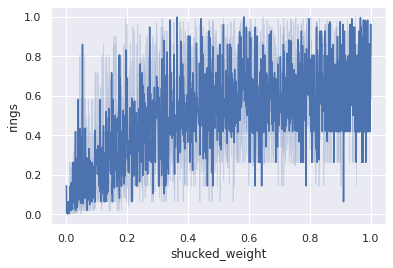

After Yeo-Johnson power transformed
     length  diameter    height  ...  viscera_weight  shell_weight     rings
0 -0.727662 -0.580526 -1.226849  ...       -0.724765     -0.625014  1.507117
1 -1.484462 -1.471014 -1.354770  ...       -1.382125     -1.383858 -1.028510
2 -0.069623  0.015803 -0.155008  ...       -0.268052     -0.111277 -0.172437
3 -0.846994 -0.580526 -0.431156  ...       -0.573706     -0.580507  0.181405
4 -1.608992 -1.547657 -1.606655  ...       -1.503065     -1.536758 -1.028510

[5 rows x 8 columns]


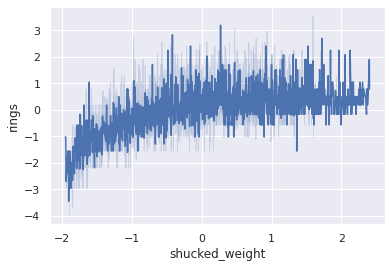

After quantile transformed
     length  diameter    height  ...  viscera_weight  shell_weight     rings
0  0.250501  0.298597  0.130261  ...        0.268046      0.296593  0.927856
1  0.081162  0.086172  0.102204  ...        0.103984      0.102204  0.144289
2  0.464930  0.482966  0.428858  ...        0.402806      0.448898  0.418838
3  0.220441  0.298597  0.338677  ...        0.312625      0.309619  0.581162
4  0.062124  0.072144  0.054108  ...        0.076152      0.068136  0.144289

[5 rows x 8 columns]


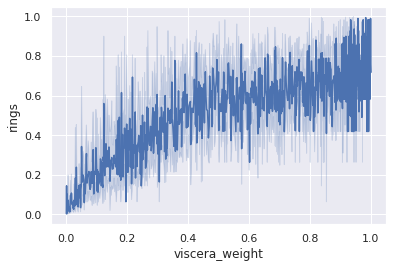

After Yeo-Johnson power transformed
     length  diameter    height  ...  viscera_weight  shell_weight     rings
0 -0.727662 -0.580526 -1.226849  ...       -0.724765     -0.625014  1.507117
1 -1.484462 -1.471014 -1.354770  ...       -1.382125     -1.383858 -1.028510
2 -0.069623  0.015803 -0.155008  ...       -0.268052     -0.111277 -0.172437
3 -0.846994 -0.580526 -0.431156  ...       -0.573706     -0.580507  0.181405
4 -1.608992 -1.547657 -1.606655  ...       -1.503065     -1.536758 -1.028510

[5 rows x 8 columns]


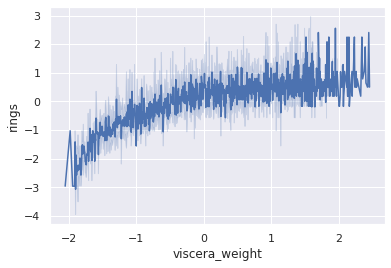

After quantile transformed
     length  diameter    height  ...  viscera_weight  shell_weight     rings
0  0.250501  0.298597  0.130261  ...        0.268046      0.296593  0.927856
1  0.081162  0.086172  0.102204  ...        0.103984      0.102204  0.144289
2  0.464930  0.482966  0.428858  ...        0.402806      0.448898  0.418838
3  0.220441  0.298597  0.338677  ...        0.312625      0.309619  0.581162
4  0.062124  0.072144  0.054108  ...        0.076152      0.068136  0.144289

[5 rows x 8 columns]


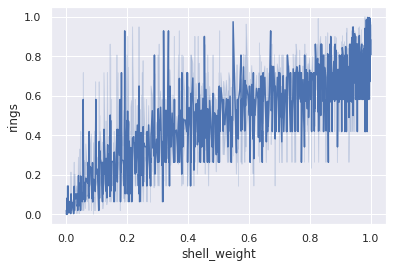

After Yeo-Johnson power transformed
     length  diameter    height  ...  viscera_weight  shell_weight     rings
0 -0.727662 -0.580526 -1.226849  ...       -0.724765     -0.625014  1.507117
1 -1.484462 -1.471014 -1.354770  ...       -1.382125     -1.383858 -1.028510
2 -0.069623  0.015803 -0.155008  ...       -0.268052     -0.111277 -0.172437
3 -0.846994 -0.580526 -0.431156  ...       -0.573706     -0.580507  0.181405
4 -1.608992 -1.547657 -1.606655  ...       -1.503065     -1.536758 -1.028510

[5 rows x 8 columns]


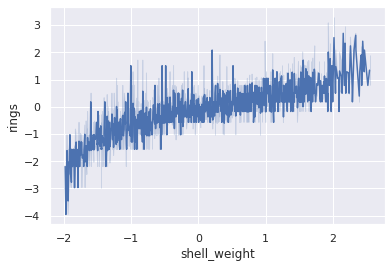

In [ ]:
#Transform features using quantiles information.
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import quantile_transform
q = quantile_transform(df_standardize, n_quantiles=500, random_state=304, copy=True)
yj = power_transform(df_standardize, method='yeo-johnson')

print("Quantile Transformed Data:",q,"",sep="\n")
print("Yeo-Johnson Power Transformed Data:",yj,"",sep="\n")
for i in index:
  if(i!='sex' and i!='rings'):
    plot(q,i,"After quantile transformed")
    plot(yj,i,"After Yeo-Johnson power transformed")

#Normalizer:
Squeeze the data between 0 and 1. Use it to perform regression so that gradients in the training process do not explode

[[0.03028649 0.02429575 0.00632355 ... 0.00672293 0.00998456 0.99845565]
 [0.0498634  0.03775372 0.01282202 ... 0.00690964 0.00997268 0.9972681 ]
 [0.05850596 0.04636322 0.01490246 ... 0.01561999 0.02318161 0.99349751]
 ...
 [0.06567512 0.0519928  0.022439   ... 0.03146933 0.03371323 0.98512682]
 [0.06179825 0.04795545 0.01483158 ... 0.02580695 0.02926765 0.98877208]
 [0.05798526 0.04532651 0.01592553 ... 0.03074852 0.04042634 0.9800326 ]]
After normalize
     length  diameter    height  ...  viscera_weight  shell_weight     rings
0  0.030286  0.024296  0.006324  ...        0.006723      0.009985  0.998456
1  0.049863  0.037754  0.012822  ...        0.006910      0.009973  0.997268
2  0.058506  0.046363  0.014902  ...        0.015620      0.023182  0.993498
3  0.043849  0.036374  0.012457  ...        0.011361      0.015447  0.996557
4  0.047030  0.036342  0.011401  ...        0.005629      0.007838  0.997611

[5 rows x 8 columns]


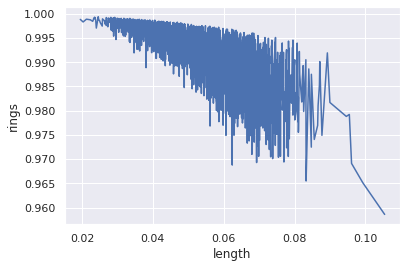

After normalize
     length  diameter    height  ...  viscera_weight  shell_weight     rings
0  0.030286  0.024296  0.006324  ...        0.006723      0.009985  0.998456
1  0.049863  0.037754  0.012822  ...        0.006910      0.009973  0.997268
2  0.058506  0.046363  0.014902  ...        0.015620      0.023182  0.993498
3  0.043849  0.036374  0.012457  ...        0.011361      0.015447  0.996557
4  0.047030  0.036342  0.011401  ...        0.005629      0.007838  0.997611

[5 rows x 8 columns]


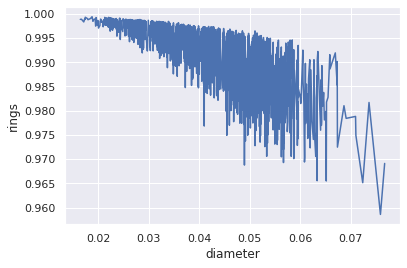

After normalize
     length  diameter    height  ...  viscera_weight  shell_weight     rings
0  0.030286  0.024296  0.006324  ...        0.006723      0.009985  0.998456
1  0.049863  0.037754  0.012822  ...        0.006910      0.009973  0.997268
2  0.058506  0.046363  0.014902  ...        0.015620      0.023182  0.993498
3  0.043849  0.036374  0.012457  ...        0.011361      0.015447  0.996557
4  0.047030  0.036342  0.011401  ...        0.005629      0.007838  0.997611

[5 rows x 8 columns]


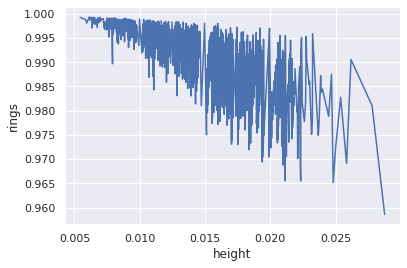

After normalize
     length  diameter    height  ...  viscera_weight  shell_weight     rings
0  0.030286  0.024296  0.006324  ...        0.006723      0.009985  0.998456
1  0.049863  0.037754  0.012822  ...        0.006910      0.009973  0.997268
2  0.058506  0.046363  0.014902  ...        0.015620      0.023182  0.993498
3  0.043849  0.036374  0.012457  ...        0.011361      0.015447  0.996557
4  0.047030  0.036342  0.011401  ...        0.005629      0.007838  0.997611

[5 rows x 8 columns]


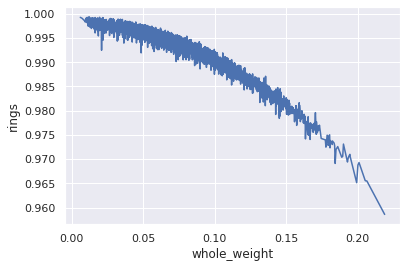

After normalize
     length  diameter    height  ...  viscera_weight  shell_weight     rings
0  0.030286  0.024296  0.006324  ...        0.006723      0.009985  0.998456
1  0.049863  0.037754  0.012822  ...        0.006910      0.009973  0.997268
2  0.058506  0.046363  0.014902  ...        0.015620      0.023182  0.993498
3  0.043849  0.036374  0.012457  ...        0.011361      0.015447  0.996557
4  0.047030  0.036342  0.011401  ...        0.005629      0.007838  0.997611

[5 rows x 8 columns]


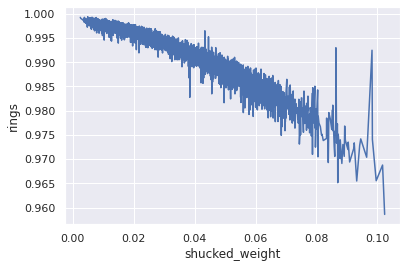

After normalize
     length  diameter    height  ...  viscera_weight  shell_weight     rings
0  0.030286  0.024296  0.006324  ...        0.006723      0.009985  0.998456
1  0.049863  0.037754  0.012822  ...        0.006910      0.009973  0.997268
2  0.058506  0.046363  0.014902  ...        0.015620      0.023182  0.993498
3  0.043849  0.036374  0.012457  ...        0.011361      0.015447  0.996557
4  0.047030  0.036342  0.011401  ...        0.005629      0.007838  0.997611

[5 rows x 8 columns]


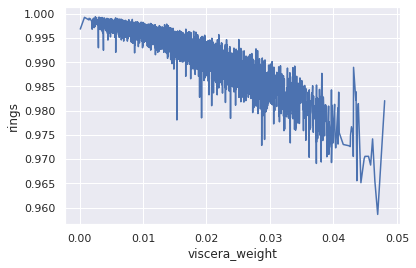

After normalize
     length  diameter    height  ...  viscera_weight  shell_weight     rings
0  0.030286  0.024296  0.006324  ...        0.006723      0.009985  0.998456
1  0.049863  0.037754  0.012822  ...        0.006910      0.009973  0.997268
2  0.058506  0.046363  0.014902  ...        0.015620      0.023182  0.993498
3  0.043849  0.036374  0.012457  ...        0.011361      0.015447  0.996557
4  0.047030  0.036342  0.011401  ...        0.005629      0.007838  0.997611

[5 rows x 8 columns]


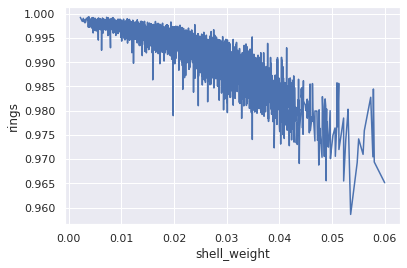

In [ ]:
#Normalize
from sklearn.preprocessing import normalize
norm = normalize(df_standardize,norm='l2')
print(norm)
for i in index:
  if(i!='sex' and i!='rings'):
    plot(norm,i,"After normalize")

[[4. 4. 2. ... 2. 2. 4.]
 [2. 2. 2. ... 0. 0. 1.]
 [5. 5. 4. ... 2. 3. 2.]
 ...
 [7. 7. 8. ... 5. 4. 2.]
 [7. 7. 5. ... 5. 4. 2.]
 [9. 8. 7. ... 7. 7. 3.]]
After binning
   length  diameter  height  ...  viscera_weight  shell_weight  rings
0     4.0       4.0     2.0  ...             2.0           2.0    4.0
1     2.0       2.0     2.0  ...             0.0           0.0    1.0
2     5.0       5.0     4.0  ...             2.0           3.0    2.0
3     4.0       4.0     4.0  ...             2.0           2.0    2.0
4     2.0       2.0     2.0  ...             0.0           0.0    1.0

[5 rows x 8 columns]


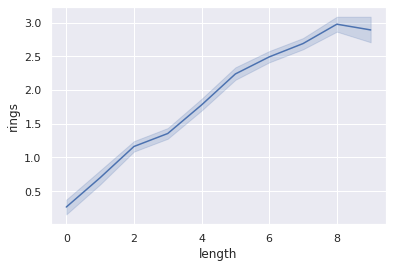

After binning
   length  diameter  height  ...  viscera_weight  shell_weight  rings
0     4.0       4.0     2.0  ...             2.0           2.0    4.0
1     2.0       2.0     2.0  ...             0.0           0.0    1.0
2     5.0       5.0     4.0  ...             2.0           3.0    2.0
3     4.0       4.0     4.0  ...             2.0           2.0    2.0
4     2.0       2.0     2.0  ...             0.0           0.0    1.0

[5 rows x 8 columns]


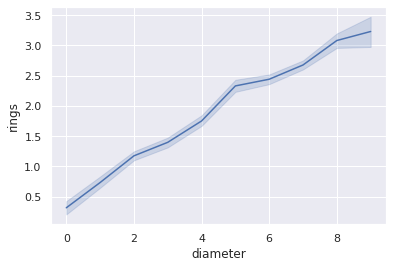

After binning
   length  diameter  height  ...  viscera_weight  shell_weight  rings
0     4.0       4.0     2.0  ...             2.0           2.0    4.0
1     2.0       2.0     2.0  ...             0.0           0.0    1.0
2     5.0       5.0     4.0  ...             2.0           3.0    2.0
3     4.0       4.0     4.0  ...             2.0           2.0    2.0
4     2.0       2.0     2.0  ...             0.0           0.0    1.0

[5 rows x 8 columns]


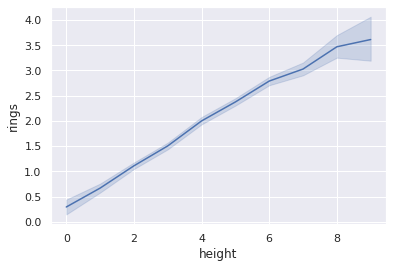

After binning
   length  diameter  height  ...  viscera_weight  shell_weight  rings
0     4.0       4.0     2.0  ...             2.0           2.0    4.0
1     2.0       2.0     2.0  ...             0.0           0.0    1.0
2     5.0       5.0     4.0  ...             2.0           3.0    2.0
3     4.0       4.0     4.0  ...             2.0           2.0    2.0
4     2.0       2.0     2.0  ...             0.0           0.0    1.0

[5 rows x 8 columns]


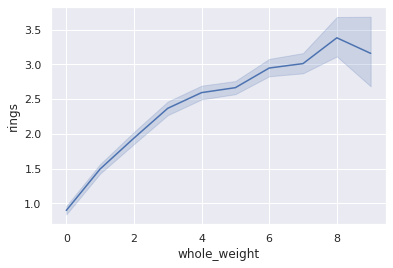

After binning
   length  diameter  height  ...  viscera_weight  shell_weight  rings
0     4.0       4.0     2.0  ...             2.0           2.0    4.0
1     2.0       2.0     2.0  ...             0.0           0.0    1.0
2     5.0       5.0     4.0  ...             2.0           3.0    2.0
3     4.0       4.0     4.0  ...             2.0           2.0    2.0
4     2.0       2.0     2.0  ...             0.0           0.0    1.0

[5 rows x 8 columns]


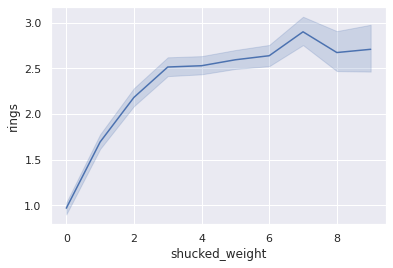

After binning
   length  diameter  height  ...  viscera_weight  shell_weight  rings
0     4.0       4.0     2.0  ...             2.0           2.0    4.0
1     2.0       2.0     2.0  ...             0.0           0.0    1.0
2     5.0       5.0     4.0  ...             2.0           3.0    2.0
3     4.0       4.0     4.0  ...             2.0           2.0    2.0
4     2.0       2.0     2.0  ...             0.0           0.0    1.0

[5 rows x 8 columns]


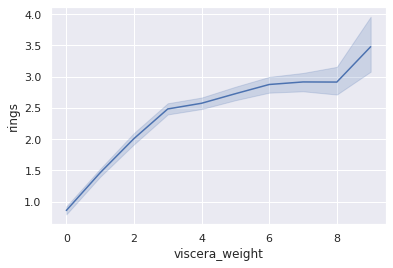

After binning
   length  diameter  height  ...  viscera_weight  shell_weight  rings
0     4.0       4.0     2.0  ...             2.0           2.0    4.0
1     2.0       2.0     2.0  ...             0.0           0.0    1.0
2     5.0       5.0     4.0  ...             2.0           3.0    2.0
3     4.0       4.0     4.0  ...             2.0           2.0    2.0
4     2.0       2.0     2.0  ...             0.0           0.0    1.0

[5 rows x 8 columns]


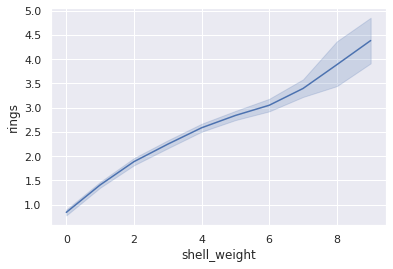

In [ ]:
#Encode the transformed result with one-hot encoding and return a sparse matrix
from sklearn.preprocessing import KBinsDiscretizer
d10 = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
X10 = d10.fit_transform(df_standardize)

print(X10)

for i in index:
  if(i!='sex' and i!='rings'):
    plot(X10,i,"After binning")

Correlation Heatmap



In [ ]:
sns.set()
sns.set_style('whitegrid',{"font.sans-serif":["simhei","Arial"]})

In [ ]:
# in the dataset,the type of the data are all object,so thet can not be proceessed to heatmap
# we need to transform the tpye from the object to int and float  
for transform in ["sex"]:
  df[transform]=df[transform].astype("category").cat.codes
  
df["length"] = pd.to_numeric(df["length"],errors="coerce")
df["diameter"] = pd.to_numeric(df["diameter"],errors="coerce")
df["height"] = pd.to_numeric(df["height"],errors="coerce")
df["whole_weight"] = pd.to_numeric(df["whole_weight"],errors="coerce")
df["shucked_weight"] = pd.to_numeric(df["shucked_weight"],errors="coerce")
df["viscera_weight"] = pd.to_numeric(df["viscera_weight"],errors="coerce")
df["shell_weight"] = pd.to_numeric(df["shell_weight"],errors="coerce")
df["rings"] = pd.to_numeric(df["rings"],errors="coerce")
df.info()
df

NameError: ignored

In [ ]:
#After transform, we can do the correlation of the data.
import matplotlib.pyplot as plt
import seaborn as sns
df.corr()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
sex,1.000000,-0.042012,-0.044614,-0.048253,-0.035691,-0.017085,-0.045497,-0.044779,-0.034391
length,-0.042012,1.000000,0.985572,0.890340,0.939734,0.913838,0.911613,0.914868,0.518270
diameter,-0.044614,0.985572,1.000000,0.896929,0.938773,0.907438,0.906869,0.922238,0.538970
height,-0.048253,0.890340,0.896929,1.000000,0.892057,0.838584,0.868008,0.897948,0.580034
whole_weight,-0.035691,0.939734,0.938773,0.892057,1.000000,0.967967,0.964607,0.958228,0.518124
shucked_weight,-0.017085,0.913838,0.907438,0.838584,0.967967,1.000000,0.926482,0.886376,0.393985
viscera_weight,-0.045497,0.911613,0.906869,0.868008,0.964607,0.926482,1.000000,0.912466,0.480864
shell_weight,-0.044779,0.914868,0.922238,0.897948,0.958228,0.886376,0.912466,1.000000,0.606772
rings,-0.034391,0.518270,0.538970,0.580034,0.518124,0.393985,0.480864,0.606772,1.000000


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


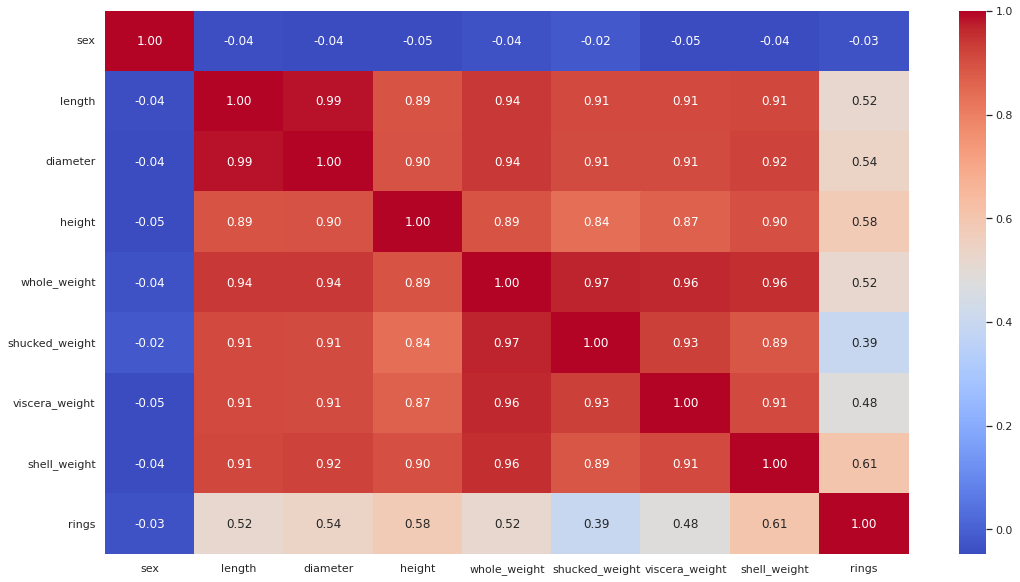

In [ ]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),annot=True,fmt=".2f",cmap="coolwarm")

Correlation analysis: The correlation coefficient is between -1 and 1, indicating the degree of correlation between the two variables.

The closer the coefficient is to 0, the lower the correlation between the two variables. The closer the coefficient is to -1 and 1, the higher the degree of correlation between the two variables.

The number between 0 and -1 indicates that the two variables are negatively correlated, and the number between 0 and 1 indicates that the two variables are positively correlated.

If the coefficient is -1, it means that the two variables are completely negatively correlated, and a coefficient of 1 means that the two coefficients are completely positively correlated.

As you can see from the picture:

The correlation coefficient between ring and length is 0.52 ，they are generally correlated.

The correlation coefficient between ring and diameter is 0.54，they are generally correlated

The correlation coefficient between ring and height is 0.58，they are generally correlated

The correlation coefficient between ring and whole_weight is 0.52，they are generally correlated

The correlation coefficient between ring and shucked_weight is 0.39，they are weakly correlated

The correlation coefficient between ring and viscera_weight is 0.48,they are relatively weakly correlated

The correlation coefficient between ring and shell_weight is 0.61,they are relatively strongly correlated

In [ ]:
# plotting a hue plot -Liang

plt.rcParams['figure.figsize'] = (18, 8)
sns.boxplot(df['Rings'=13], df['Length'], hue = df['Sex'], palette = 'pastel')
plt.title('Rings vs length and sex', fontsize = 20)


SyntaxError: ignored